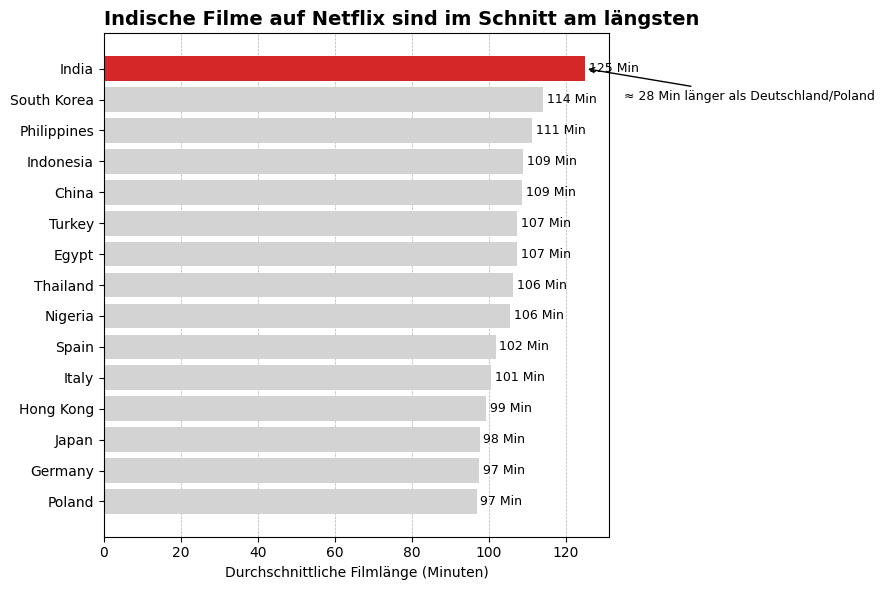

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("../data/netflix1.csv")

# Nur Filme
movies = df[df["type"] == "Movie"].copy()

# Dauer in Minuten als Zahl
movies["duration_min"] = (
    movies["duration"]
    .str.replace(" min", "", regex=False)
    .astype(float)
)

# Länder aufsplitten (falls mehrere)
movies = movies.dropna(subset=["duration_min", "country"])
movies["country"] = movies["country"].str.split(",")
movies = movies.explode("country")
movies["country"] = movies["country"].str.strip()

# Kennzahlen pro Land
country_stats = (
    movies.groupby("country")
    .agg(avg_duration=("duration_min", "mean"),
         count=("duration_min", "size"))
    .reset_index()
)

# Nur Länder mit genügend Filmen
min_movies = 20
country_stats = country_stats[country_stats["count"] >= min_movies]

# Sortieren, Top 15
top_countries = (
    country_stats
    .sort_values("avg_duration", ascending=False)
    .head(15)
)

# ----------------------------
# STORYTELLING PLOT
# ----------------------------

countries = top_countries["country"]
values = top_countries["avg_duration"]

highlight_country = "India"  # Land, das du hervorheben willst

colors = [
    "tab:red" if c == highlight_country else "lightgrey"
    for c in countries
]

fig, ax = plt.subplots(figsize=(9, 6))

# Horizontaler Balken-Plot
ax.barh(countries, values, color=colors)

# Längstes oben
ax.invert_yaxis()

# Titel & Untertitel (Story!)
ax.set_title(
    "Indische Filme auf Netflix sind im Schnitt am längsten",
    loc="left", fontsize=14, fontweight="bold"
)
ax.set_xlabel("Durchschnittliche Filmlänge (Minuten)")

# Werte an die Balken schreiben
for i, (country, val) in enumerate(zip(countries, values)):
    ax.text(
        val + 1, i, f"{val:.0f} Min",
        va="center", fontsize=9
    )

# Kleine Text-Anmerkung
india_val = top_countries[top_countries["country"] == "India"]["avg_duration"].iloc[0]
ger_val = top_countries[top_countries["country"] == "Germany"]["avg_duration"].iloc[0] \
          if "Germany" in list(top_countries["country"]) else None

if ger_val is not None:
    diff = india_val - ger_val
    ax.annotate(
        f"≈ {diff:.0f} Min länger als Deutschland/Poland",
        xy=(india_val, 0),
        xytext=(india_val + 10, 1),
        arrowprops=dict(arrowstyle="->", linewidth=1),
        fontsize=9
    )

# Gitterlinien dezent auf der x-Achse
ax.xaxis.grid(True, linestyle="--", linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


### Kernaussage der Grafik

- **Indien** hat mit durchschnittlich **≈125 Minuten** die **längsten Filme** im Datensatz.  
  - Tradition des „vollständigen Pakets“: lange Handlungen, mehrere Storylines, Musik- und Tanzszenen.  
  - Publikum ist lange Laufzeiten gewohnt – Filme sind als großes Kino-Erlebnis gedacht.

- Länder wie **Südkorea, Philippinen, Indonesien, China, Türkei, Ägypten**  
  - Ebenfalls oft **über 105 Minuten**.  
  - Häufig kinotypische, dramatische Filme mit mehr Zeit für Figuren und Plot.

- **Polen, Deutschland, Japan** liegen mit **ca. 97–100 Minuten** am unteren Ende unserer Auswahl.  
  - Starke Orientierung am klassischen **90-Minuten-Format** (Drama, Thriller, Komödie).  
  - Tendenziell straffer, fokussierter erzählt, weniger „epische“ Struktur.

- **Wichtiger Hinweis:**  
  - Grundlage ist **nur der Netflix-Datensatz** (nur Filme, nur Länder mit ≥20 Titeln).  
  - Trotzdem zeigt sich klar:  
    **Je nach Produktionsland unterscheiden sich typische Filmlängen deutlich – Indien sticht dabei als „Langfilm-Champion“ heraus.**


### Kernaussage der Grafik

- **Indien** hat mit durchschnittlich **≈125 Minuten** die **längsten Filme** im Datensatz.  
  - Tradition des „vollständigen Pakets“: lange Handlungen, mehrere Storylines, Musik- und Tanzszenen.  
  - Publikum ist lange Laufzeiten gewohnt – Filme sind als großes Kino-Erlebnis gedacht.
  - Bollywood

- Länder wie **Südkorea, Philippinen, Indonesien, China, Türkei, Ägypten**  
  - Ebenfalls oft **über 105 Minuten**.  
  - Häufig kinotypische, dramatische Filme mit mehr Zeit für Figuren und Plot.

- **Polen, Deutschland, Japan** liegen mit **ca. 97–100 Minuten** am unteren Ende unserer Auswahl.  
  - Starke Orientierung am klassischen **90-Minuten-Format** (Drama, Thriller, Komödie).  
  - Tendenziell straffer, fokussierter erzählt, weniger „epische“ Struktur.

- **Wichtiger Hinweis:**  
  - Grundlage ist **nur der Netflix-Datensatz** (nur Filme, nur Länder mit ≥20 Titeln).  
  - Trotzdem zeigt sich klar:  
    **Je nach Produktionsland unterscheiden sich typische Filmlängen deutlich – Indien sticht dabei als „Langfilm-Champion“ heraus.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("../data/netflix1.csv")

# Nur Filme
movies = df[df["type"] == "Movie"].copy()

# Dauer in Minuten als Zahl
movies["duration_min"] = (
    movies["duration"]
    .str.replace(" min", "", regex=False)
    .astype(float)
)

# Nur Zeilen mit Land und Dauer
movies = movies.dropna(subset=["duration_min", "country"])

# Länder aufsplitten (falls mehrere angegeben sind)
movies["country"] = movies["country"].str.split(",")
movies = movies.explode("country")
movies["country"] = movies["country"].str.strip()
